# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [18]:
# @@@ 1
unique_years = df["YEAR"].unique()
print("Unique years:", unique_years)
print("Number of years:", len(unique_years))

Unique years: [1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
Number of years: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [17]:
# @@@ 2
mi_oh = df[df["STATE"].isin(["MICHIGAN", "OHIO"])]
mi_avg = mi_oh[mi_oh["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean()
oh_avg = mi_oh[mi_oh["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean()
print("Michigan's average:", mi_avg)
print("Ohio's average:", oh_avg)
if mi_avg > oh_avg:
    print("Michigan has the higher average.")
elif oh_avg > mi_avg:
    print("Ohio has the higher average.")
else:
    print("Both states have the same average.")

Michigan's average: 234.36363636363637
Ohio's average: 239.45454545454547
Ohio has the higher average.


Find the average for your chosen test across all states in 2019

In [20]:
# @@@ 3
data_2019 = df[df["YEAR"] == 2019]
average_2019 = data_2019["AVG_MATH_4_SCORE"].mean()
print("The average Grade 4 Math score across all states in 2019:", average_2019)

The average Grade 4 Math score across all states in 2019: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [22]:
# @@@ 4
max_scores = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
print(max_scores)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [27]:
# @@@ 5
df['ENROLL'] = df['ENROLL'].fillna(df['ENROLL'].median())
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df['FEDERAL_REVENUE_PROP'] = df['FEDERAL_REVENUE'] / df['TOTAL_REVENUE']
df['STATE_REVENUE_PROP'] = df['STATE_REVENUE'] / df['TOTAL_REVENUE']
df['LOCAL_REVENUE_PROP'] = df['LOCAL_REVENUE'] / df['TOTAL_REVENUE']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,FEDERAL_REVENUE_PROP,STATE_REVENUE_PROP,LOCAL_REVENUE_PROP
0,1992_ALABAMA,ALABAMA,1992,649933.5,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,731634.0,208.0,252.0,207.0,NaN,4.083184,0.113546,0.619298,0.267156
1,1992_ALASKA,ALASKA,1992,649933.5,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,122487.0,NaN,NaN,NaN,NaN,1.496288,0.101735,0.686659,0.211606
2,1992_ARIZONA,ARIZONA,1992,649933.5,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,673477.0,215.0,265.0,209.0,NaN,5.233735,0.091431,0.420436,0.488133
3,1992_ARKANSAS,ARKANSAS,1992,649933.5,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,441490.0,210.0,256.0,211.0,NaN,2.681847,0.104308,0.560051,0.335641
4,1992_CALIFORNIA,CALIFORNIA,1992,649933.5,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,5254844.0,208.0,261.0,202.0,NaN,41.756321,0.078921,0.630103,0.290976


Feature engineering justification: I created the EXPENDITURE_PER_STUDENT feature to analyze how financial investment per student relates to academic performance. Revenue proportions were added to examine the impact of funding sources on outcomes. Missing enrollment values were filled with the median to enable accurate calculations and maintain data usability.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

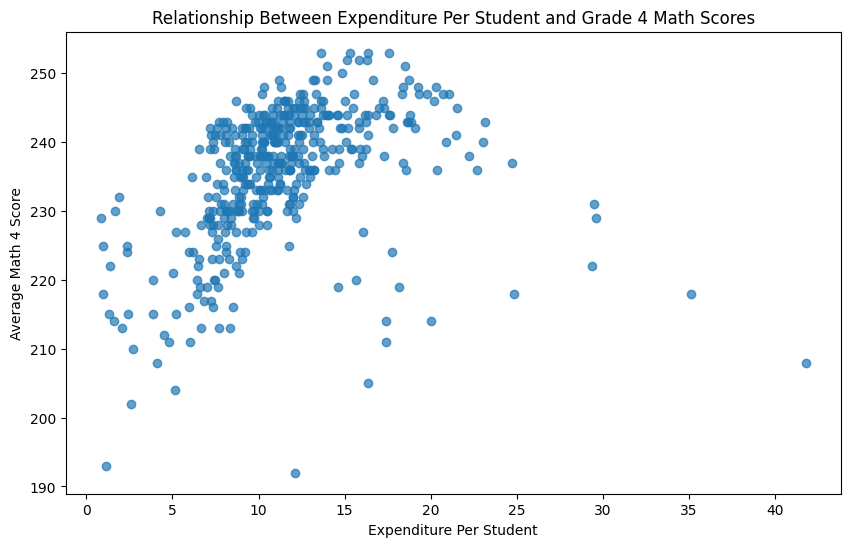

In [28]:
# @@@ 6
plt.figure(figsize=(10, 6))
plt.scatter(df['EXPENDITURE_PER_STUDENT'], df['AVG_MATH_4_SCORE'], alpha=0.7)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Math 4 Score')
plt.title('Relationship Between Expenditure Per Student and Grade 4 Math Scores')
plt.show()

The scatter plot shows the relationship between expenditure per student and Grade 4 Math scores. A positive trend might suggest that higher spending per student correlates with better performance.

**Visualization 2**

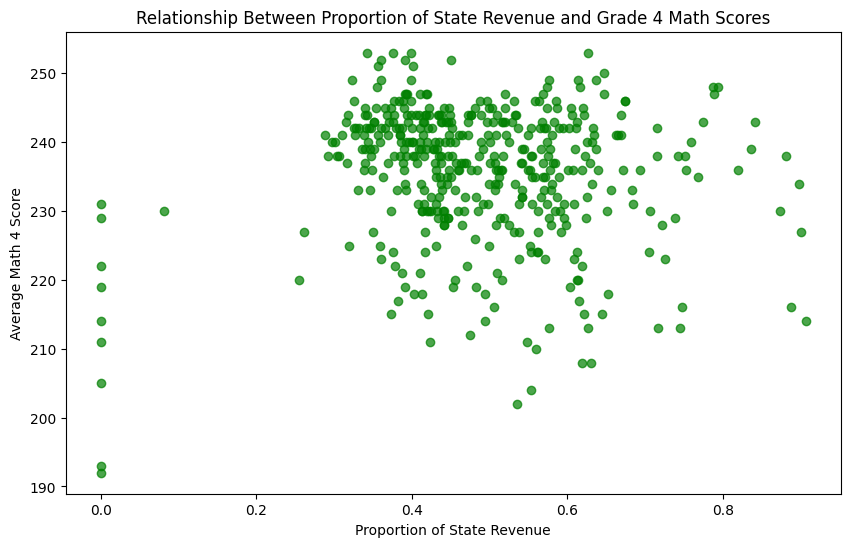

In [30]:
# @@@ 7
plt.figure(figsize=(10, 6))
plt.scatter(df['STATE_REVENUE_PROP'], df['AVG_MATH_4_SCORE'], alpha=0.7, color='green')
plt.xlabel('Proportion of State Revenue')
plt.ylabel('Average Math 4 Score')
plt.title('Relationship Between Proportion of State Revenue and Grade 4 Math Scores')
plt.show()

The scatter plot illustrates the relationship between the proportion of state revenue and Grade 4 Math scores. This can help identify if greater reliance on state funding correlates with student performance.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# @@@ 8

df = df.dropna(subset=['EXPENDITURE_PER_STUDENT', 'STATE_REVENUE_PROP', 'AVG_MATH_4_SCORE'])

X = df[['EXPENDITURE_PER_STUDENT', 'STATE_REVENUE_PROP']]
y = df['AVG_MATH_4_SCORE']

In [50]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [51]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [52]:
# @@@ 11
# create your model here
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [61]:
# @@@ 12
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

r2 = model.score(X_test, y_test)
print("R^2 score:", r2)

mean_error = np.mean(model.predict(X_test) - y_test)
print("Mean Error:", mean_error)

mae = np.mean(np.abs(model.predict(X_test)-y_test))
print("Mean Absolute Error:", mae)

rmse = np.mean((model.predict(X_test)-y_test)**2)**0.5
print("Root Mean Squared Error (RMSE):", rmse)

Intercept: 225.68036207465053
Coefficients: [0.68418743 5.04857145]
R^2 score: 0.15372073785789897
Mean Error: 1.6660688507073032
Mean Absolute Error: 7.144408841104435
Root Mean Squared Error (RMSE): 9.238456454790528


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

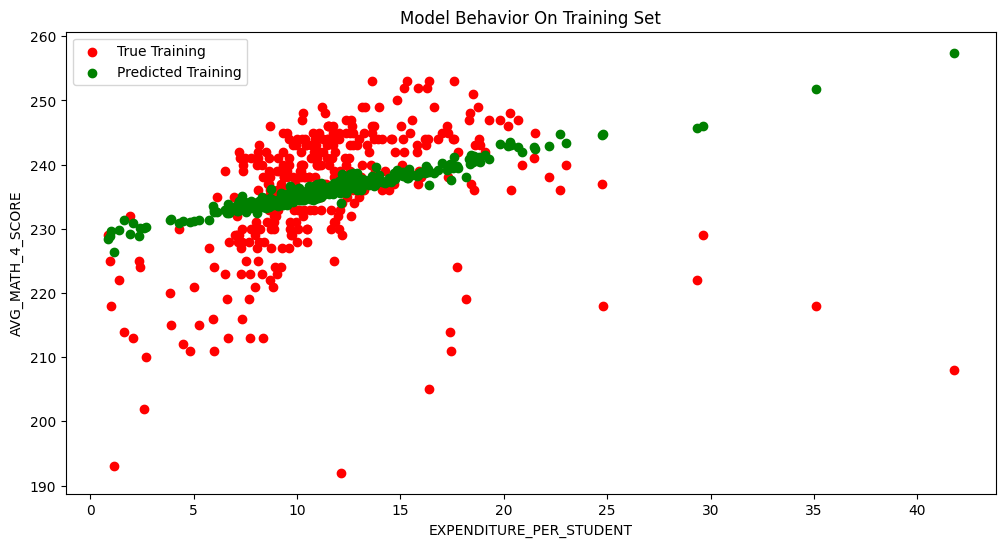

In [62]:
# @@@ 13

col_name = 'EXPENDITURE_PER_STUDENT' 

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")  
plt.scatter(X_train[col_name], model.predict(X_train), color="green")  

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE') 
plt.title("Model Behavior On Training Set")
plt.show()

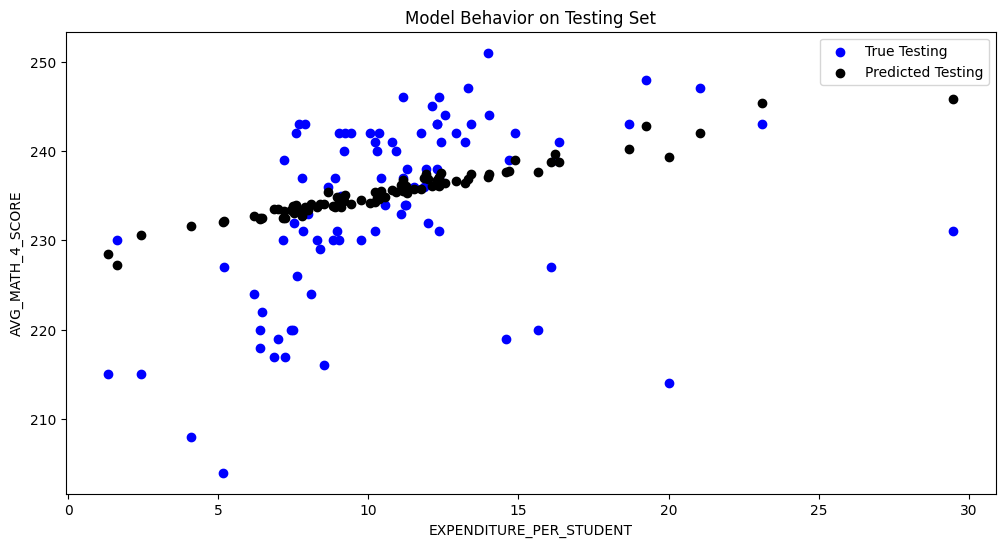

In [63]:
# @@@ 14


col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color="blue")  
plt.scatter(X_test[col_name], model.predict(X_test), color="black") 

plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE') 
plt.title("Model Behavior on Testing Set")
plt.show()